In [1]:
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt

### Definición de función objetivo a optimizar

Supongamos que tenemos un conjunto de $N$ datos $(x, y)$. Tenemos un modelo que aproxima $y$ a partir de $x$, que notamos como $\hat{y}= f(x,w)+\epsilon$, donde $\hat{y}$ es una aproximación de $y$, $\epsilon$ es un error del modelo de hipótesis $f$, y este modelo está parametrizado por unos parámetros w (a priori desconocidos). El objetivo consiste en encontrar el valor de los parámetros $w$ que hacen que $\hat{y}$ sea lo más próximo a $y$ posible. Para ello, necesitamos una medida de error que nos indique "cómo de buena" es la aproximación de $\hat{y}$. 

Podemos coger, por ejemplo, como medida de error el Error Cuadrático Medio (MSE= Mean Seuqred Error):

$MSE(\hat{y}, y)= {1\over N}\sum_{i=1}^N (\hat{y}-y)^2$

Queremos encontrar los parámetros $w$ que hagan mínima esta medida. A esto se le suele denominar **función objetivo** o función a optimizar:



In [3]:

# En este caso tenemos 3 parámetros w=[w0, w1, w2]
# Esta función es el modelo que tenemos sobre los datos, para el que queremos calcular sus w
def function(x, w):
    return w[0] * x ** 2 - w[1] * x + w[2]


# Esta es la función objetivo: Mide la bondad del ajuste entre las salidas del modelo y las salidas reales esperadas
def objective_function(w):
    y_hat= function(x, w)
    return np.mean( (y-y_hat)**2 )

### Definición de dataset

Creamos dataset sintético (pares (x=input, y=output) a optimizar. Noscreamos 1000 valores

In [4]:
NData= 1000

wReales= np.array([2, 3, 4]) # Esto es un ejemplo. Los w reales que queremos obtimizar
x= np.random.randn(NData)*100 # Ejemplo: Datos reales x (en este caso generados sintéticamente)
y= function(x, wReales) # Ejemplo: Datos reales y (en este caso generados sintéticamente conforme a los w Reales que queremos)



### Optimización

Damos valores iniciales a los parámetros a optimizar, y optimizamos

In [5]:

w_InitialValue= np.random.rand(3) # tenemos 3 parámetros, les damos 3 valores iniciales (en este caso aleatorios)

# Minimizamos la función objetivo con el método BFGS
# Por poner, ponemos 100 iteraciones (podemos no ponerlas también, mira las opciones)
output= minimize(method='BFGS', fun= objective_function, x0= [w_InitialValue], 
                 options= {'maxiter':100})

w_optimized= output.x
print('Valor de parámetros w optimizado: {}'.format(w_optimized))
print('El error MSE: cometido por el modelo optimizado es {}'.format(objective_function(w_optimized)))

Valor de parámetros w optimizado: [1.99999999 2.99999993 4.00010317]
El error MSE: cometido por el modelo optimizado es 2.4043310511098938e-08


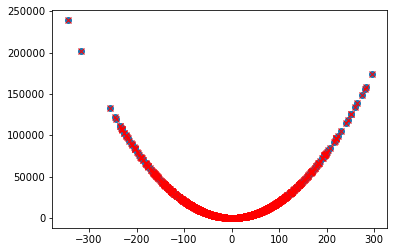

In [5]:
plt.plot(x, y, 'o') # Datos reales
plt.plot(x, function(x, w_optimized), 'x', color='red')  # Función aproximada con nuestros parámetros